In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [4]:
iris=sns.load_dataset("iris")

In [5]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print(iris.species.value_counts())

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64


In [7]:
# Label encoding of species column numerically
le = LabelEncoder()
le.fit(iris['species'])
print(list(le.classes_))
iris['species'] = le.transform(iris['species'])

['setosa', 'versicolor', 'virginica']


In [8]:
print(iris['species'][0:5])
print(iris['species'][50:55])
print(iris['species'][100:105])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64
100    2
101    2
102    2
103    2
104    2
Name: species, dtype: int64


In [9]:
iris.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
iris_matrix = pd.DataFrame.as_matrix(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [33]:
cluster_model = KMeans(n_clusters=3, random_state=10)

In [15]:
print(cluster_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)


In [10]:
cluster_model.fit(iris_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [11]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
cluster_labels = cluster_model.fit_predict(iris_matrix)

In [13]:
i=iris

In [14]:
i.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [15]:
i['pred'] = cluster_labels

In [16]:
i.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0


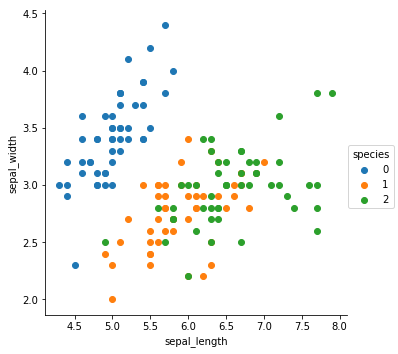

In [32]:
sns.FacetGrid(i, hue="species", size=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

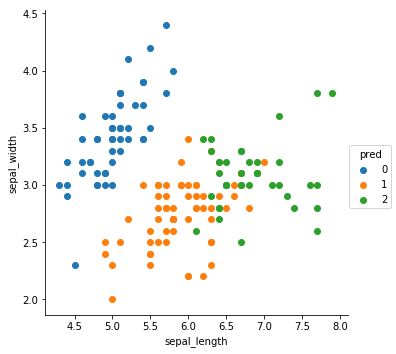

In [33]:
sns.FacetGrid(i, hue="pred", size=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

In [25]:
# Performance Metrics
sm.accuracy_score(iris.species, cluster_model.labels_)

0.89333333333333331

In [22]:
from sklearn import metrics

In [23]:
metrics.adjusted_rand_score(iris.species, cluster_model.labels_)  #adjusted Rand index is a 
#function that measures the similarity of the two assignments

0.73023827228346971

In [26]:
# Confusion Matrix
sm.confusion_matrix(iris.species, cluster_model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])